In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# imports
import rasterio
from matplotlib import pyplot
import  osgeo
# import gdal 
from osgeo import osr, gdal
from PIL import Image
from PIL.TiffTags import TAGS
from os.path import exists
import json
from deepforest import main, utilities, get_data, preprocess
Image.MAX_IMAGE_PIXELS = None
import pandas as pd
import geopandas as gpd

In [1]:
!pip install pycuda
import torch
import pycuda.driver as cuda
cuda.init()
## Get Id of default device
torch.cuda.current_device()
# 0
cuda.Device(0).name() # '0' is the id of your GPU


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Robeck\Downloads\df\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'NVIDIA GeForce GTX 1080 Ti'

In [3]:
src_img =r"D:\Dropbox\P.Robeck\BPLA Dropbox\03 Planning\1297-Makkah-Environmental-Sustainability-Strategy\02-Data\02-satellite\Makkah-WV2-ST-2023_I602488\Makkah-WV2-ST-2023-MOS\23JAN19075627-S2AM-Makkah-WV2-ST-2023.TIF"
dst_img= r"D:\Dropbox\P.Robeck\BPLA Dropbox\03 Planning\1297-Makkah-Environmental-Sustainability-Strategy\02-Data\03-poc\23JAN19075627-S2AM-Makkah-WV2-ST-2023.TIF"

# check if the files exist input file
print(exists(src_img))
print(exists(dst_img))

True
False


In [4]:
exImg=Image.open(src_img)
print(exImg.getbands())
print(exImg.size)

# rasterio
src = rasterio.open(src_img)
transform = src.transform 
crs = src.crs
print(crs)
print(src.res)

('R', 'G', 'B')
(148236, 123881)
EPSG:32637
(0.46, 0.46)


In [5]:
model = main.deepforest()
model.use_release()

Reading config file: c:\Users\Robeck\Downloads\df\.venv\lib\site-packages\deepforest\data\deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [6]:
predicted_raster = model.predict_tile(src_img, return_plot = False, patch_size=300,patch_overlap=0.25) # runs 12h

100%|██████████| 363109/363109 [12:10:54<00:00,  8.28it/s]  


2030969 predictions in overlapping windows, applying non-max supression
1371253 predictions kept after non-max suppression


In [7]:
gdf = utilities.annotations_to_shapefile(predicted_raster, transform=transform, crs=crs)

c:\Users\Robeck\Downloads\df\.venv\lib\site-packages\deepforest\utilities.py:431: UserWarning: This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities
  warnings.warn("This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities")


In [8]:
gdf.to_file('Mekka-test-5e.shp')

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_GMT.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_GMT.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load r

In [46]:
raster_path = get_data(r"D:\Dropbox\P.Robeck\BPLA Dropbox\03 Planning\1297-Makkah-Environmental-Sustainability-Strategy\02-Data\03-poc\RCMC-test.TIF")
# Window size of 300px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = False, patch_size=300, patch_overlap=0.25)

100%|██████████| 289/289 [00:17<00:00, 16.33it/s]

1359 predictions in overlapping windows, applying non-max supression
949 predictions kept after non-max suppression


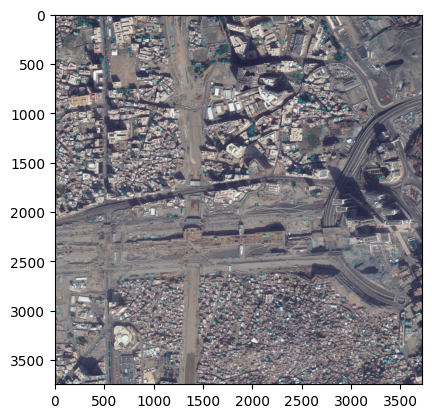

In [40]:
import matplotlib.pyplot as plt
plt.imshow(predicted_raster[:,:,::-1],  )


In [37]:
r = rasterio.open(image_path)
transform = r.transform 
crs = r.crs
print(crs)

gdf = utilities.annotations_to_shapefile(predicted_raster, transform=transform, crs=crs)

NameError: name 'image_path' is not defined

In [45]:
gdf.to_file('trained-test-5e.shp')

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_GMT.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_GMT.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load r